This project is completed by Mengyuan Liu, Yining Liu, Chengyang Shen

# Project 3  
This link provides Twitter data of Elon Musk from 2010-2022. For analysis consider the years **2017-2021** (last 5 complete years). Each year has thousands of tweets. Assume each year to be a document (all the tweets in one year will be considered as a document)
1. Compute the **term frequencies for each year**. They should be normalized (scale of [0, 1]). **Exclude stopwords.**
2. Show the **top 10 words (for each year)** by highest value of **word frequency.**
3. Plot a **histogram of word frequencies** for each year
4. Demonstrate **Zipf’s law** by plotting **log-log plots** of word frequencies v. rank for each year
5. Use **TF-IDF** to calculate and show the **5 most “important” words** for each year

In [1]:
import pandas as pd
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import math

import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15.0,10.0)

# 0. Bag of Words of Each Year

According to the description of the datasets, we only want the tweet column
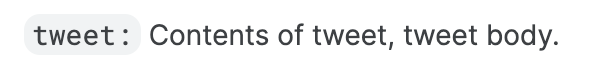

read one of the csv, and analysis what we will do next

In [2]:
dataset_2020 = pd.read_csv('./tweets/2020.csv',usecols=['tweet'])
dataset_2020

,tweet
0,Entertainment will be critical when cars drive...
1,@kimpaquette Just meeting with Larry Ellison t...
2,@richierichhhhh_ Absolutely
3,What should Tesla do with in-car gaming in an ...
4,@PPathole @WSJ Absolutely
...,...
11712,That was a total non sequitur btw
11713,"Great Voltaire quote, arguably better than Twa..."
11714,I made the volume on the Model S http://t.co/...
11715,Went to Iceland on Sat to ride bumper cars on ...


we could find that there are @username, url and stopwords in each sentence(each row) which are nonsense, so exclude them in bag of words. 

In [3]:
dataset_2020.iloc[11714,0]

'I made the volume on the Model S  http://t.co/wMCnT53M go to 11.  Now I just need to work in a miniature Stonehenge...'

After we got the total words list, we found that there are many tokens start with or including &, so we want to find out them and replace them with their representing mark

In [4]:
# pattern of @username,url
pattern = re.compile(r'(.*@.*)|(http)') 
stop_words = set(stopwords.words('english'))
total = []  # total unique words of those five years
#lem = WordNetLemmatizer()
for y in range(2017,2022,1):
    # read csv file of the years 2017-2021
    dataset = pd.read_csv(f'./tweets/{y}.csv',usecols=['tweet'])
    display(dataset)
    
    # each year's bag of words
    bag = []   
    for sentence in dataset['tweet']:      
        for word in sentence.split(" "):
            #print('\nword: ',word,'\n')
            word = word.lower()
            #print('\nlowered word: ',word,'\n')
            #word = lem.lemmatize(word)
            #print('\nlemmatized word: ',lem_word,'\n')
            if (re.match(pattern,word)==None) and (word not in stop_words) and (word != ''): # exclude the @username, url, and stopwords
                if re.match(r'.*&.*',word):
                    # replece &gt; or &lt; with > or <
                    word = re.sub(r'&gt;','>',word)
                    word = re.sub(r'&lt;','<',word)
                    # replace &amp; with & (and) 
                    word = re.sub(r'&amp;','&',word)
                # remove the starting or ending bracket, !, ?,',',:
                #word = re.findall('[^)(\].*\w.*[.\d*]?[^,!.?\s)(:]',word) # this will keep the single caracters
                word = re.findall('[^)(\'\"].*\w.*[.\d*]?[^,\!\.\?\'\"\s)(:]',word)# this result might be null
                if word:
                    word = word[0]
                    bag.append(word)  

    exec('bag_words_{} = {}'.format(y,bag))
    total = list(set(total+bag))
print('total: ',total)

,tweet
0,@neilsiegel @Tesla Coming very soon
1,@Kreative Vastly better maps/nav coming soon
2,@dd_hogan Ok
3,@Jason @Tesla Sure
4,"@kabirakhtar Yeah, it’s terrible. Had to upgra..."
...,...
3162,That was a total non sequitur btw
3163,"Great Voltaire quote, arguably better than Twa..."
3164,I made the volume on the Model S http://t.co/...
3165,Went to Iceland on Sat to ride bumper cars on ...


,tweet
0,@Ben757677 @vincent13031925 Thanks Tesla owner...
1,"@Grimezsz Turns out if you take Dayquil, you e..."
2,Excited to have Larry Ellison &amp; Kathleen W...
3,@NutmegTheRed @Tesla Ok
4,@westcoastbill Tesla team did a great job!
...,...
2280,"Gonna put an old school drive-in, roller skate..."
2281,https://t.co/3k71xzDIP1
2282,Falcon Heavy goes vertical https://t.co/uG1k0...
2283,Using a neural net to detect rain using camera...


,tweet
0,@Joe__Wakefield @austinbarnard45 @tjq1190 @tyg...
1,@austinbarnard45 @tjq1190 @tyger_cyber @fawful...
2,@IrinaAntony @tjq1190 @tyger_cyber @fawfulfan ...
3,@tjq1190 @tyger_cyber @fawfulfan @_Mikemo He d...
4,@geofficient Pretty much
...,...
8307,That was a total non sequitur btw
8308,"Great Voltaire quote, arguably better than Twa..."
8309,I made the volume on the Model S http://t.co/...
8310,Went to Iceland on Sat to ride bumper cars on ...


,tweet
0,Entertainment will be critical when cars drive...
1,@kimpaquette Just meeting with Larry Ellison t...
2,@richierichhhhh_ Absolutely
3,What should Tesla do with in-car gaming in an ...
4,@PPathole @WSJ Absolutely
...,...
11712,That was a total non sequitur btw
11713,"Great Voltaire quote, arguably better than Twa..."
11714,I made the volume on the Model S http://t.co/...
11715,Went to Iceland on Sat to ride bumper cars on ...


,tweet
0,@roshanpateI 🤣 $7
1,@tesla_raj Many UI improvements coming
2,@CSmithson80 @heydave7 @BLKMDL3 @mims This cha...
3,@BLKMDL3 @mims Predicting macroeconomics is ch...
4,"@mims If history is any guide, not many will m..."
...,...
3110,@flcnhvy Tesla is responsible for 2/3 of all t...
3111,So proud of the Tesla team for achieving this ...
3112,"@newscientist Um, we have giant fusion reactor..."
3113,@comma_ai Tesla Full Self-Driving will work at...


total:  ['trier', 'densifying', 'command', '*might*', 'extreme', 'eggs', 'smells', 'slo-mo', 'retire', 'losses', 'reset', 'sockboots', 'merlin', 'neuralink', 'winsome', 'metallic', 'reasonable', 'infinite', 'twitmeme', 'well-meaning', 'trust', 'remains', 'execs', 'inquire', 'implications', 'became', 'fsw', 'rated', 'hammering', 'machined', 'explicit', 'overcompensated', 'sn10', 'main', 'peers', 'rbc', 'import', 'ipo+', 'inaccurately', 'experts', 'ineffective', 'excellence', 'builds', 'mechanically', '*something*', 'autonav', 'puerto', 'gift', 'car’s', 'overnight”', 'mgmt', '$5/hr', 'sedan', 'likes/retweets', 'larry', 'belts', '“caraoke”', 'stonks', 'optimal', 'awful', 'grow', 'off-the-cuff', 'inconel', 'strong', 'aging', 'vibe”', 'viewing', 'independence', '+2v', 'qa-tested', '~20', 'breaks', 'hourglass', '*in', 'letting', 'pegging', '20k', 'wide', 'преступленіе', 'darkest', 'meth', 'chiang', 'armored', 'transparent', 'mel', 'doge', 'splish', 'nope', 'ejected', 'outcompete', 'finishes'

To conclude the action we take on data cleaning and the reasons:

- Remove the stop words using stop word package.

- Remove usernames and URLs since these are unique representing term that have no meaning on Musk's attitude but will create chaos when further analysing histogram.

- Turn the html version of symbol back to original symbols as its the variant that occur since the text data is gathered from reptile tweets.

- Remove the puncuation at the start/end of words since split function will take them as one term but in texture meaning the puncuations does nothing.

# 1. term frequencies for each year (exclude stopwords)

First, we create the term frequency table of all the unique terms across all five years.

In [5]:
names = locals()
for y in range(2017,2022,1):
    exec('wordDict_{} = {}'.format(y,dict.fromkeys(total,0)))
    
    for word in names.get('bag_words_'+str(y)):
        exec('wordDict_{}[word]+=1'.format(y))
# view the result using dataFrame
WD = pd.DataFrame([wordDict_2017, wordDict_2018, wordDict_2019, wordDict_2020, wordDict_2021]).rename(index={0:'2017',1:'2018',2:'2019',3:'2020',4:'2021'})

In [6]:
WD = WD.T
WD

,2017,2018,2019,2020,2021
trier,1,0,1,1,0
densifying,0,0,0,1,1
command,3,3,6,8,0
*might*,0,1,2,2,0
extreme,6,5,14,23,5
...,...,...,...,...,...
so-called,1,1,2,2,1
salesy,1,0,1,1,0
puts,0,0,0,1,0
announcement/demonstration,1,0,1,1,0


Then we normalize the frequency by the word bag of each year.

In [7]:
def computeTF(wordDict, doc):
    tfDict = {}
    corpusCount = len(doc)
    for word, count in wordDict.items():
        tfDict[word] = count/float(corpusCount)
    return(tfDict)

In [8]:
tf = pd.DataFrame()
for y in range(2017,2022,1):
    wordDict = names.get('wordDict_'+str(y))
    doc = names.get('bag_words_'+str(y))
    term = pd.DataFrame(computeTF(wordDict, doc),index=[str(y)])
    tf = pd.concat([tf,term])
tf = tf.T
tf

,2017,2018,2019,2020,2021
trier,0.000040,0.000000,0.000016,0.000012,0.000000
densifying,0.000000,0.000000,0.000000,0.000012,0.000051
command,0.000121,0.000160,0.000097,0.000095,0.000000
*might*,0.000000,0.000053,0.000032,0.000024,0.000000
extreme,0.000243,0.000266,0.000226,0.000272,0.000255
...,...,...,...,...,...
so-called,0.000040,0.000053,0.000032,0.000024,0.000051
salesy,0.000040,0.000000,0.000016,0.000012,0.000000
puts,0.000000,0.000000,0.000000,0.000012,0.000000
announcement/demonstration,0.000040,0.000000,0.000016,0.000012,0.000000


# 2.  top 10 words for each year

We've try two different ways to compute the top 10 words of the each year.

- Compute direct from our TF table

- Using external tool WordCloud



## By Term Frequencies
First we get the data directly from the term frequency table we've compute from previous step.

In [9]:
tw = {}
for y in range(2017,2022,1):
    term = tf.nlargest(n=10,columns=[str(y)])[str(y)]
    tw[str(y)] = list(term.index)
    print(f'top 10 words and frequencies for {y}:\n',term,'\n')
top_words_by_tf = pd.DataFrame(data=tw,index=range(1,11))

top 10 words and frequencies for 2017:
 tesla     0.012056
model     0.008415
good      0.006918
rocket    0.006028
like      0.005542
yes       0.005300
launch    0.004490
next      0.004086
would     0.003965
falcon    0.003924
Name: 2017, dtype: float64 

top 10 words and frequencies for 2018:
 tesla     0.015131
car       0.006287
yes       0.005701
good      0.005328
model     0.005221
it’s      0.005062
like      0.004955
would     0.004049
don’t     0.003943
people    0.003783
Name: 2018, dtype: float64 

top 10 words and frequencies for 2019:
 tesla    0.013288
yes      0.006313
model    0.006022
good     0.005748
like     0.005054
car      0.004505
would    0.004359
great    0.003891
next     0.003536
time     0.003504
Name: 2019, dtype: float64 

top 10 words and frequencies for 2020:
 tesla    0.012084
yes      0.006533
good     0.005551
model    0.004770
like     0.004628
great    0.004367
would    0.004308
it’s     0.004285
car      0.003776
much     0.003634
Name: 2020, d

All in one table:

In [10]:
top_words_by_tf

,2017,2018,2019,2020,2021
1,tesla,tesla,tesla,tesla,tesla
2,model,car,yes,yes,great
3,good,yes,model,good,good
4,rocket,good,good,model,much
5,like,model,like,like,it’s
6,yes,it’s,car,great,haha
7,launch,like,would,would,like
8,next,would,great,it’s,would
9,would,don’t,next,car,time
10,falcon,people,time,much,beta


## By WordCould

Then we use the WordCloud to read our word bags and take the top words it generate for each year.

,2017,2018,2019,2020,2021
1,tesla,tesla,tesla,tesla,tesla
2,model,car,car,yes,time
3,car,yes,yes,car,car
4,good,like,model,good,great
5,yes,model,good,would,good
6,rocket,good,time,model,would
7,like,would,would,time,much
8,launch,time,like,great,haha
9,one,make,great,need,year
10,would,people,need,one,like


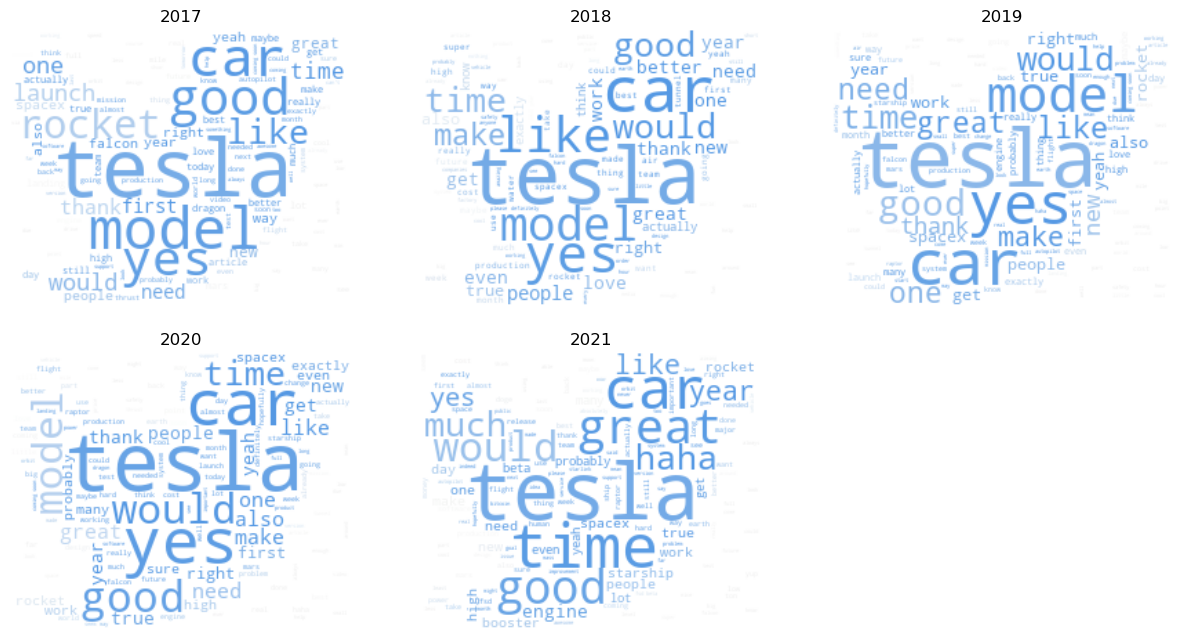

In [11]:
import imageio
plt.figure(figsize=(15,8))
grid = plt.GridSpec(2,3,hspace=0.1)
mk = imageio.imread('icon.png')
image_colors = ImageColorGenerator(mk)
wcf = {}
for i in range(5):
    # draw plots 
    year = str(i+2017)
    plt.subplot(grid[i//3,i%3])
    exec('bag = bag_words_{}'.format(year))
    wc = WordCloud(stopwords=stop_words,
                   background_color='white',
                   mask=mk).generate((" ").join(bag))
    wcf[str(year)] = list(wc.words_.keys())[:10]
    plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    plt.title(str(i+2017))
top_words_by_wc = pd.DataFrame(data=wcf,index=range(1,11))
top_words_by_wc

In [12]:
for y in range(2017,2022,1):
    set1 = set(top_words_by_tf[str(y)])
    set2 = set(top_words_by_wc[str(y)])
    interset = set1 & set2
    print(f'there are {len(interset)} same words of two tables in {y}, the interset is:\n',interset,'\n')

there are 8 same words of two tables in 2017, the interset is:
 {'like', 'tesla', 'rocket', 'would', 'good', 'yes', 'launch', 'model'} 

there are 8 same words of two tables in 2018, the interset is:
 {'like', 'car', 'would', 'people', 'good', 'yes', 'model', 'tesla'} 

there are 9 same words of two tables in 2019, the interset is:
 {'like', 'tesla', 'car', 'would', 'good', 'yes', 'great', 'time', 'model'} 

there are 7 same words of two tables in 2020, the interset is:
 {'tesla', 'car', 'would', 'good', 'yes', 'great', 'model'} 

there are 8 same words of two tables in 2021, the interset is:
 {'like', 'haha', 'would', 'good', 'much', 'great', 'time', 'tesla'} 



We can conclude from the similarities and differences of the result generate by these two methods.

- Similarities: Both result indicates Elon Musk really talked much about tesla model and launching rocket. Other high frequency words are also positive vibe that represents he's mind towards the development of Tesla is optimistic and he's very confident about his product.

- Differences: Though two results shows quite similar words list, there's also small differences in ranking. The reason of this happening is that our table calculate the frequency throught a word list of all five years whereas WordCloud is a document based technique. It calculates the frequency only among the text.

# 3. histogram of word frequencies for each year df.plot.hist

We will draw the histogram through original frequencies, not the normalized one

In [13]:
# original frequencies (count)
WD

,2017,2018,2019,2020,2021
trier,1,0,1,1,0
densifying,0,0,0,1,1
command,3,3,6,8,0
*might*,0,1,2,2,0
extreme,6,5,14,23,5
...,...,...,...,...,...
so-called,1,1,2,2,1
salesy,1,0,1,1,0
puts,0,0,0,1,0
announcement/demonstration,1,0,1,1,0


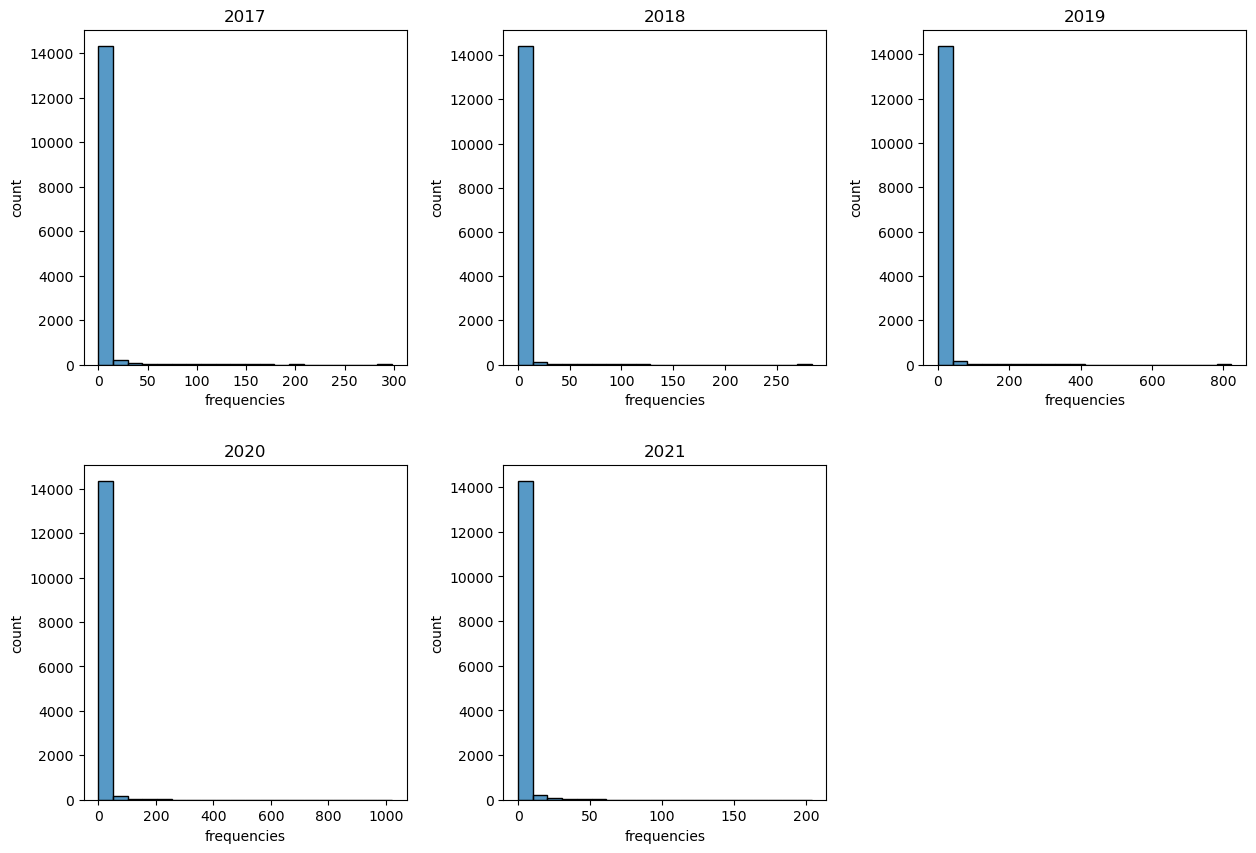

In [14]:
import seaborn as sns
plt.figure(figsize=(15,10))
grid = plt.GridSpec(2,3,hspace=0.3,wspace=0.3)
for i in range(5):
    data = WD[[str(i+2017)]]
    plt.subplot(grid[i//3,i%3])
    sns.histplot(data=data,x=str(i+2017),stat='count',bins=20)
    plt.xlabel('frequencies')
    plt.ylabel('count')
    plt.title(str(i+2017))

We can found that the histogram is extremely left skewed. This is because there are too much zeros for each year (including other year's words in the dataframe), so we will remove the zeros.

We also notice that for year 2017, 2018 and 2019, there are obvious bars at the very right. This tells us the important information of these histogram concentrate on the very big and very small data. Consider this situation, we think it's better to plot a log scale graph because it helps to highlights the differences that might be hidden in normal graph at large and small scale.

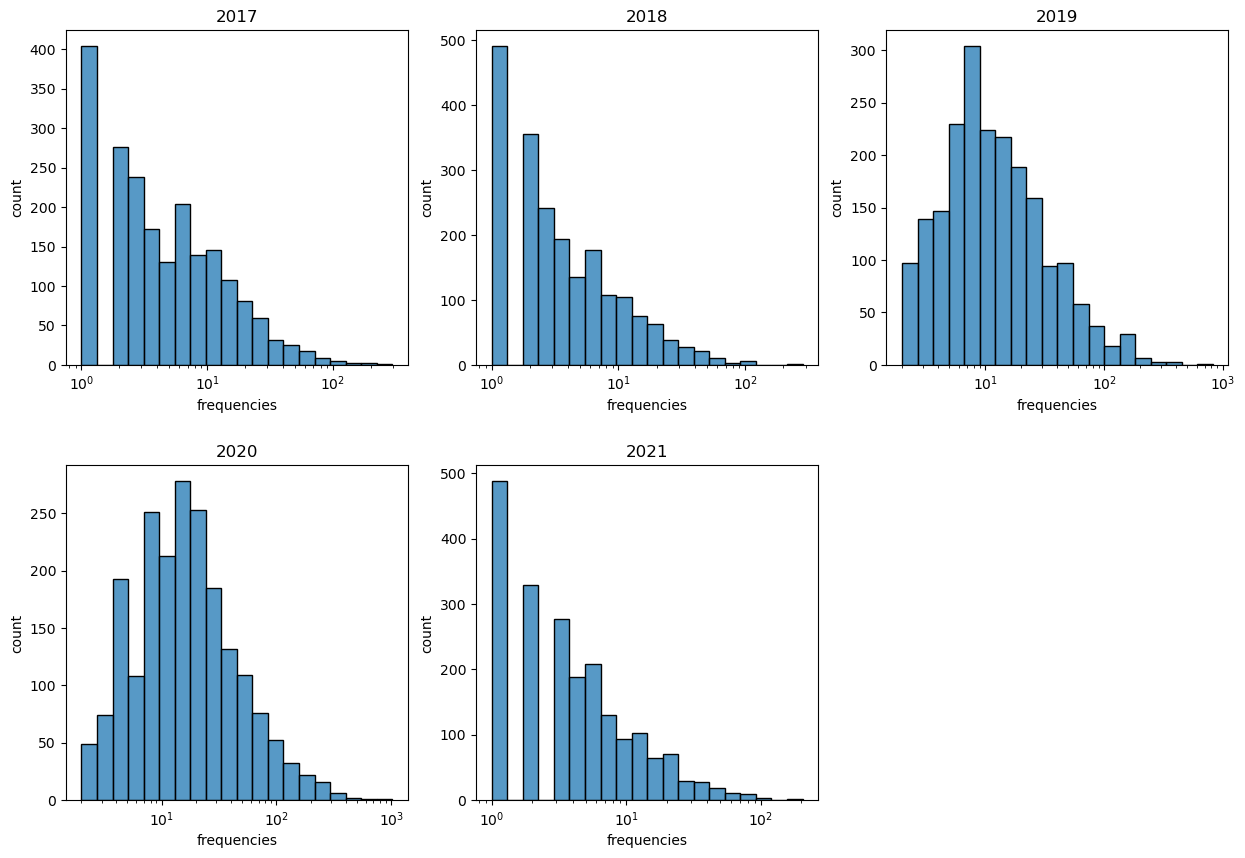

In [15]:
plt.figure(figsize=(15,10))
grid = plt.GridSpec(2,3,hspace=0.3)
for i in range(5):
    data = WD[[str(i+2017)]].loc[(tf!=0).all(axis=1)]
    plt.subplot(grid[i//3,i%3])
    sns.histplot(data=data,x=str(i+2017),stat='count',log_scale=True, bins=20)
    plt.xlabel('frequencies')
    plt.ylabel('count')
    plt.title(str(i+2017))

To conclude the finding from histogram.

- Looking at the logged x-axis, only 2019 and 2020 get towards 	$10^{3}$, this shows that the highest word frequency in these two years are much larger than the other three. Combining with the top words result, it means Musk have mentioned Tesla much more in these two years.

- Looking at the trending of the graph, 2017, 2018 and 2021 have similar concave down trend. This shows that most of the words are only mentioned once. While 2019 and 2020 are different. The peak of these two years appears at around $10^{1}$ which tells us there are not that many unique words he tweets.

# 4.  log-log plots of word frequencies v. rank for each year

Zipf's Law: $frequency \propto \frac{1}{rank}$

By plotting on a log-log scale the result will yield roughly linear line on the graph.

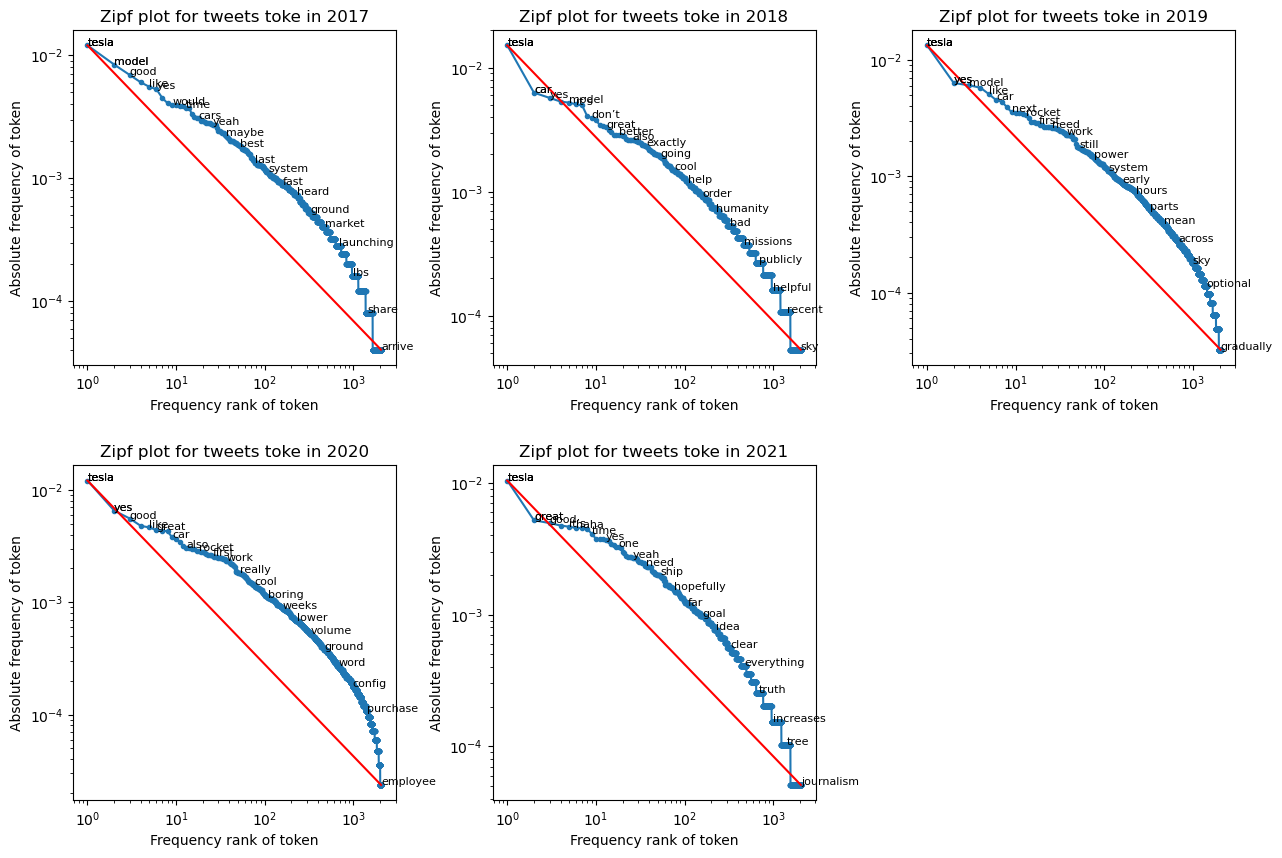

In [16]:
from pylab import *
import matplotlib.gridspec as gridspec
import numpy as np
grid = plt.GridSpec(2,3,hspace=0.3,wspace=0.3)
fig = plt.figure(figsize=(15,10))
plt.rc('font', size=10)    

#tokens = total
#ranks = arange(1, len(total)+1)
for i in range(5):
    # remove the zero's
    tokens = tf[str(i+2017)].loc[(tf!=0).all(axis=1)].index
    counts = tf[str(i+2017)].loc[(tf!=0).all(axis=1)].values
    ranks = arange(1, len(counts)+1)
    indices = argsort(-counts)
    frequencies = counts[indices]
    
    ax = plt.subplot(grid[i//3,i%3])
    ax.loglog(ranks, frequencies, marker=".")
    
    log_list = list(logspace(-0.5, log10(len(counts)-2), 25).astype(int))
    # show words on subplots
    for n in log_list:
        ax.annotate(tokens[indices[n]],
                    (ranks[n],frequencies[n]), # these are the coordinates to position the label
                     color='black',
                     size=8)
        
    # trend line   
    x = [ranks[n] for n in log_list]
    values = [frequencies[n] for n in log_list]
    '''
    the following doesn't work:
    coeffs = np.polyfit(x,values, 1)
    trendline = np.poly1d(coeffs)
    ax.plot(x, trendline(x), c='r', linestyle='--')
    '''
    # trend line by start and end points
    ax.plot([x[0],x[-1]],[values[0],values[-1]],color='r')
    
    ax.set_title("Zipf plot for tweets toke in {}".format(i+2017))
    ax.set_xlabel("Frequency rank of token")
    ax.set_ylabel("Absolute frequency of token")
    #plt.tight_layout()

From the plot we can find out that all five of them have a decreasing concave up shape which is close to linear but not exactly fits it. There might be several reasons of why the Zipf law has not been perfect fit.

- First is that we have removed stop words. Zipf law apply to the raw text material, when removing the high frequency stop words like "the", the frequency and rank association have been changed.

- Second is that the data is complete personal. It fits the language custom only for Elon Musk but not general population.

- Also the size of sample matters. Our data only contains one year tweets which is not enough for obtain a great trend. The more text is been analyzing, the more it fits exactly the Zipf law.

# 5. five most “important” words for each year by TF-IDF

## By Hand

term frequency, tf  
document frequency, df(t) = # of documents where t occurs  
inverse document frequency, $IDF = log_{10}(\frac{N+1}{df(t)+1})$  
Term Frequency-Inverse Document Frequency (TF-IDF) is the frequency of a term adjusted for how rarely it is used

In [17]:
def computeIDF(docList):
    N = len(docList)
    dfDict = dict.fromkeys(docList[0].keys(), 0)
    idfDict = {}
    # Get the DF values first
    for word in dfDict.keys():
        for doc_dict in docList:
            if doc_dict[word] > 0:
                dfDict[word] += 1

    for word, val in dfDict.items():
        idfDict[word] = math.log10((N +1 )/ (float(val) + 1))
        
    return(idfDict)

In [18]:
idfs = computeIDF([wordDict_2017,wordDict_2018,wordDict_2019,wordDict_2020,wordDict_2021])
idfs

{'trier': 0.17609125905568124,
 'densifying': 0.3010299956639812,
 'command': 0.07918124604762482,
 '*might*': 0.17609125905568124,
 'extreme': 0.0,
 'eggs': 0.0,
 'smells': 0.17609125905568124,
 'slo-mo': 0.17609125905568124,
 'retire': 0.17609125905568124,
 'losses': 0.17609125905568124,
 'reset': 0.3010299956639812,
 'sockboots': 0.17609125905568124,
 'merlin': 0.07918124604762482,
 'neuralink': 0.07918124604762482,
 'winsome': 0.3010299956639812,
 'metallic': 0.17609125905568124,
 'reasonable': 0.0,
 'infinite': 0.07918124604762482,
 'twitmeme': 0.17609125905568124,
 'well-meaning': 0.17609125905568124,
 'trust': 0.0,
 'remains': 0.0,
 'execs': 0.07918124604762482,
 'inquire': 0.17609125905568124,
 'implications': 0.3010299956639812,
 'became': 0.17609125905568124,
 'fsw': 0.3010299956639812,
 'rated': 0.0,
 'hammering': 0.17609125905568124,
 'machined': 0.17609125905568124,
 'explicit': 0.07918124604762482,
 'overcompensated': 0.47712125471966244,
 'sn10': 0.17609125905568124,
 'm

In [19]:
tf = tf.T
tf

,trier,densifying,command,*might*,extreme,eggs,smells,slo-mo,retire,losses,...,intratracheal,it’d,~400,next,returned,so-called,salesy,puts,announcement/demonstration,thud
2017,0.000040,0.000000,0.000121,0.000000,0.000243,0.000121,0.000000,0.000040,0.000000,0.000081,...,0.000000,0.000000,0.000000,0.004086,0.000202,0.000040,0.000040,0.000000,0.000040,0.000000
2018,0.000000,0.000000,0.000160,0.000053,0.000266,0.000373,0.000053,0.000000,0.000053,0.000000,...,0.000000,0.000000,0.000000,0.003357,0.000160,0.000053,0.000000,0.000000,0.000000,0.000053
2019,0.000016,0.000000,0.000097,0.000032,0.000226,0.000161,0.000016,0.000016,0.000016,0.000048,...,0.000000,0.000000,0.000016,0.003536,0.000129,0.000032,0.000016,0.000000,0.000016,0.000016
2020,0.000012,0.000012,0.000095,0.000024,0.000272,0.000118,0.000012,0.000012,0.000024,0.000036,...,0.000047,0.000012,0.000012,0.003042,0.000107,0.000024,0.000012,0.000012,0.000012,0.000012
2021,0.000000,0.000051,0.000000,0.000000,0.000255,0.000051,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.003416,0.000000,0.000051,0.000000,0.000000,0.000000,0.000000


In [20]:
def computeTFIDF(tfBow, idfs):
    tfidf = pd.DataFrame()
    for j in range(len(tfBow.columns)):
        word = tfBow.columns[j]
        val = tfBow.iloc[0,j]
        tfidf.loc[0,word] = val*idfs[word]
        #tfidf = tfidf.reset_index(names=[tfBow.index[0]])
    return(tfidf)

In [21]:
tfidfs = pd.DataFrame()
for y in range(2017,2022,1):
    tfidf = computeTFIDF(tf[tf.index==str(y)],idfs)
    tfidf = tfidf.rename(index={0:str(y)})
    tfidfs = pd.concat([tfidfs,tfidf])
tfidfs

,trier,densifying,command,*might*,extreme,eggs,smells,slo-mo,retire,losses,...,intratracheal,it’d,~400,next,returned,so-called,salesy,puts,announcement/demonstration,thud
2017,0.000007,0.000000,0.000010,0.000000,0.0,0.0,0.000000,0.000007,0.000000,0.000014,...,0.000000,0.000000,0.000000,0.0,0.000016,0.0,0.000007,0.000000,0.000007,0.000000
2018,0.000000,0.000000,0.000013,0.000009,0.0,0.0,0.000009,0.000000,0.000009,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000013,0.0,0.000000,0.000000,0.000000,0.000009
2019,0.000003,0.000000,0.000008,0.000006,0.0,0.0,0.000003,0.000003,0.000003,0.000009,...,0.000000,0.000000,0.000005,0.0,0.000010,0.0,0.000003,0.000000,0.000003,0.000003
2020,0.000002,0.000004,0.000007,0.000004,0.0,0.0,0.000002,0.000002,0.000004,0.000006,...,0.000023,0.000006,0.000004,0.0,0.000008,0.0,0.000002,0.000006,0.000002,0.000002
2021,0.000000,0.000015,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [22]:
tfidfs = tfidfs.T
tfidfs

,2017,2018,2019,2020,2021
trier,0.000007,0.000000,0.000003,0.000002,0.000000
densifying,0.000000,0.000000,0.000000,0.000004,0.000015
command,0.000010,0.000013,0.000008,0.000007,0.000000
*might*,0.000000,0.000009,0.000006,0.000004,0.000000
extreme,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
so-called,0.000000,0.000000,0.000000,0.000000,0.000000
salesy,0.000007,0.000000,0.000003,0.000002,0.000000
puts,0.000000,0.000000,0.000000,0.000006,0.000000
announcement/demonstration,0.000007,0.000000,0.000003,0.000002,0.000000


In [23]:
iw = {}
for y in range(2017,2022,1):
    term = tfidfs.nlargest(n=5,columns=[str(y)])[str(y)]
    iw[str(y)] = list(term.index)
    print(f'5 most important words of {y}:')
    display(term)
    print('\n')
imp_words = pd.DataFrame(data=iw,index=range(1,6))

5 most important words of 2017:


that's       0.000392
i've         0.000114
world's      0.000107
station      0.000106
solarcity    0.000100
Name: 2017, dtype: float64



5 most important words of 2018:


we’re     0.000139
media     0.000131
uaw       0.000105
cave      0.000103
didn’t    0.000101
Name: 2018, dtype: float64



5 most important words of 2019:


that's        0.000156
starship      0.000127
we’re         0.000095
cybertruck    0.000065
media         0.000060
Name: 2019, dtype: float64



5 most important words of 2020:


starship       0.000152
ventilators    0.000141
c19            0.000130
we’re          0.000119
that's         0.000115
Name: 2020, dtype: float64



5 most important words of 2021:


doge        0.000752
starbase    0.000462
doo         0.000365
fees        0.000365
fsd         0.000258
Name: 2021, dtype: float64

All in one table:

In [24]:
imp_words

,2017,2018,2019,2020,2021
1,that's,we’re,that's,starship,doge
2,i've,media,starship,ventilators,starbase
3,world's,uaw,we’re,c19,doo
4,station,cave,cybertruck,we’re,fees
5,solarcity,didn’t,media,that's,fsd


## By TfidfVectorizer

join words together, so can be input to TfidfVectorizer

In [25]:
documents = []
for i in range(2017,2022):
    n = names.get('bag_words_'+str(i))
    doc = (r" ").join(n)
    documents.append(doc)

In [26]:
documents

['coming soon vastly better maps/nav coming soon sure yeah it’s terrible upgrade old linux bunch drivers first major browser upgrades coming cars months note slower first code optimized similar total size maybe slightly bigger account really gamechanging think feature like add sustainable energy production solar batteries grow much faster auto percentage basis big focus next year primary remaining model ramp gonna say we’ll last last one sounds like good cheesy fun next update done promise make pickup truck right model core design/engineering elements mind almost years dying build sorry delay advanced neural net consumer product far it’s going exhaustive testing results blowing away though think similar experience wanted send note deep gratitude tesla owners taking chance new company experts said would fail much blood sweat tears tesla team went creating cars you’d truly love hope improve further will least whatever left build obelisks circle complete hats sold out flamethrowers soon o

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)

In [28]:
# reponce
print(X)
# features
features = vectorizer.get_feature_names_out()
features

  (0, 8745)	0.0014083739218165678
  (0, 5712)	0.0011911936424770845
  (0, 7786)	0.0016741811015018135
  (0, 9684)	0.0016741811015018135
  (0, 12423)	0.0016741811015018135
  (0, 5685)	0.0016741811015018135
  (0, 10966)	0.0016741811015018135
  (0, 8698)	0.0016741811015018135
  (0, 9461)	0.0014083739218165678
  (0, 11963)	0.0016741811015018135
  (0, 12434)	0.003348362203003627
  (0, 10139)	0.0016741811015018135
  (0, 6141)	0.0016741811015018135
  (0, 4791)	0.0014083739218165678
  (0, 1506)	0.0014083739218165678
  (0, 6629)	0.0011911936424770845
  (0, 6856)	0.0016741811015018135
  (0, 5492)	0.0016741811015018135
  (0, 1311)	0.0016741811015018135
  (0, 5319)	0.003348362203003627
  (0, 9883)	0.003348362203003627
  (0, 11163)	0.0016741811015018135
  (0, 5055)	0.0016741811015018135
  (0, 3010)	0.0016741811015018135
  (0, 2993)	0.0016741811015018135
  :	:
  (4, 10467)	0.011911072734948527
  (4, 7050)	0.06253313185847977
  (4, 10414)	0.020844377286159923
  (4, 11719)	0.011911072734948527
  (4, 1

array(['000', '000th', '01', ..., '相煎何太急', '豆在釜中泣', '逆転の法則'], dtype=object)

In [29]:
# combine the above into a dataframe 
responsePD = pd.DataFrame(data = X.toarray(),index = range(2017,2022),columns = features)

In [30]:
# trans the dataframe to make it long
responsePD = responsePD.T
responsePD

,2017,2018,2019,2020,2021
000,0.022633,0.027231,0.023459,0.020499,0.007444
000th,0.000000,0.000000,0.000000,0.000768,0.000000
01,0.005023,0.000000,0.002061,0.002058,0.000000
014,0.001674,0.000000,0.000687,0.000514,0.000000
02,0.000000,0.000000,0.000687,0.000514,0.002093
...,...,...,...,...,...
本是同根生,0.000000,0.000000,0.000000,0.000000,0.003125
煮豆燃豆萁,0.000000,0.000000,0.000000,0.000000,0.003125
相煎何太急,0.000000,0.000000,0.000000,0.000000,0.003125
豆在釜中泣,0.000000,0.000000,0.000000,0.000000,0.003125


In [31]:
tfidfs.shape

(14635, 5)

we could find the first difference between two methods is their shape, the vectorizer output fewer tokens

In [32]:
responsePD.nlargest(n=5,columns=[2017])[2017].index

Index(['tesla', 'model', 'good', 'rocket', 'like'], dtype='object')

In [33]:
tfw = {}
for y in range(2017,2022,1):
    tfw[y] = list(responsePD.nlargest(n=5,columns=[y])[y].index)
impvec_words = pd.DataFrame(data=tfw,index=range(1,6))
impvec_words

,2017,2018,2019,2020,2021
1,tesla,tesla,tesla,tesla,tesla
2,model,car,yes,yes,great
3,good,yes,model,good,good
4,rocket,good,good,model,much
5,like,re,like,like,it


In [34]:
for y in range(2017,2022,1):
    set1 = set(imp_words[str(y)])
    set2 = set(impvec_words[y])
    interset = set1 & set2
    print(f'there are {len(interset)} same words of two tables in {y}, the interset is:\n',interset,'\n')

there are 0 same words of two tables in 2017, the interset is:
 set() 

there are 0 same words of two tables in 2018, the interset is:
 set() 

there are 0 same words of two tables in 2019, the interset is:
 set() 

there are 0 same words of two tables in 2020, the interset is:
 set() 

there are 0 same words of two tables in 2021, the interset is:
 set() 



Comparing the result done by these two different methods, we can see the most important words are completely different. By looking at the code of TfidfVectorizer, we find out that the idf it uses is smooth idf, which add 1 to the numerator and denominator of the idf as if an extra document was seen containing every term in the collection exactly once: idf(d, t) = log [ (1 + n) / (1 + df(d, t)) ] + 1. Also the tokenization process of the function keeps terms that are not English as well. Both can result in the difference of the result.